# Analysis of Inaugral Addresses

In [219]:
import sys
import nltk
from nltk.corpus import inaugural, stopwords
import os, re
from nltk.tokenize import word_tokenize
from textstat.textstat import *
from nltk.probability import FreqDist
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Flesch Reading Ease & Flesch-Kincaid Grade Level Scores

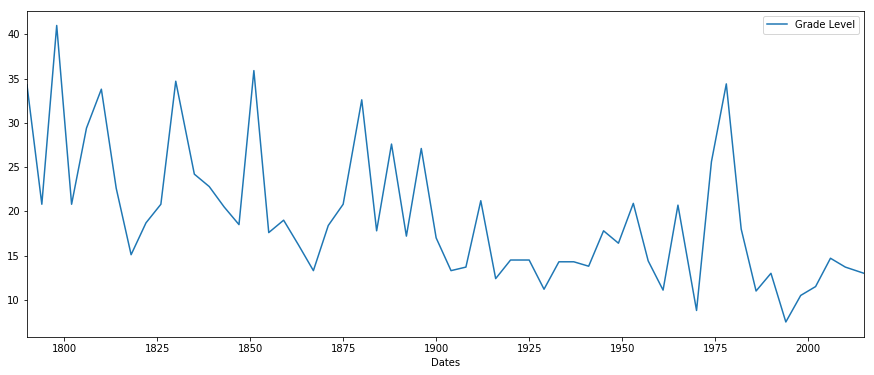

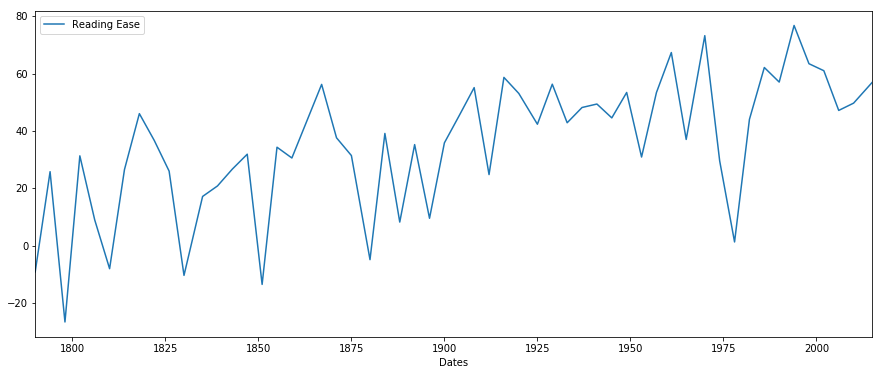

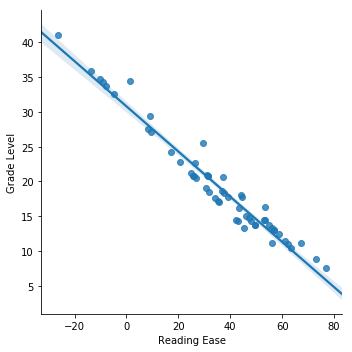

In [36]:
rl = []
for fileid in inaugural.fileids():
    rawText = inaugural.raw(fileid)
    readingLevel = textstat.flesch_reading_ease(rawText)
    gradeLevel = textstat.flesch_kincaid_grade(rawText)
    rl.append({'Reading Ease': readingLevel, 'Address': fileid[:-4], 'Grade Level': gradeLevel})
    
  
df1 = pd.DataFrame(rl)
ts = pd.date_range(start='1790', end='2015', periods=56).year
ts_df = pd.DataFrame(ts)
df1 = df1.assign(Dates=ts_df)
df1.plot(y='Grade Level', x="Dates", figsize=(15, 6))
df1.plot(y="Reading Ease", x="Dates", figsize=(15, 6))
sns.lmplot(x="Reading Ease", y="Grade Level", data=df1)

## Nr. of Sentences Per Text & Avg. Sentence Length Per Text

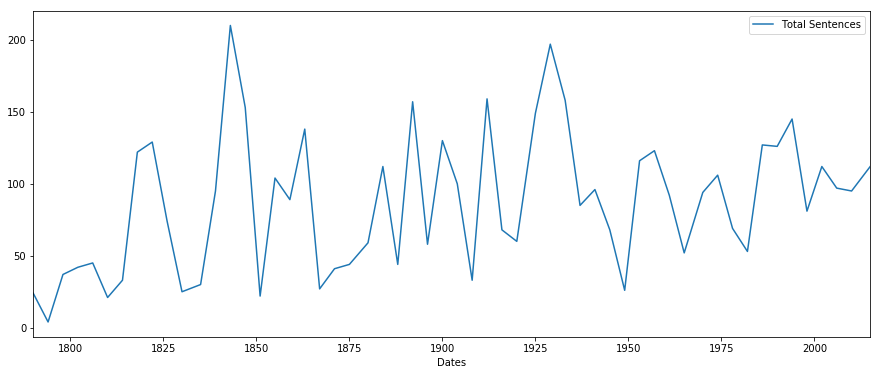

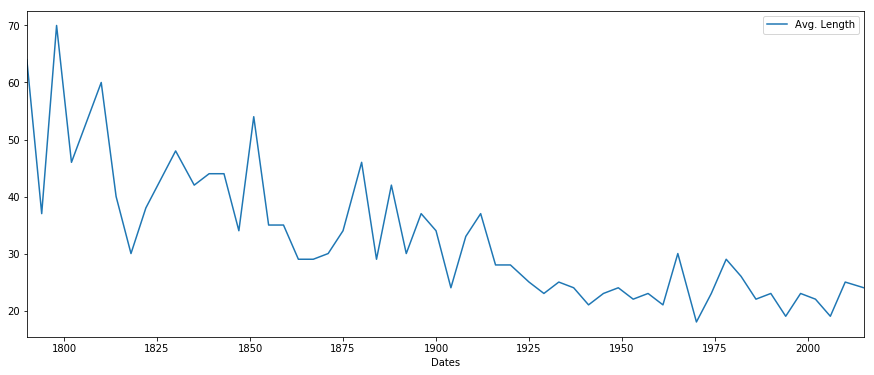

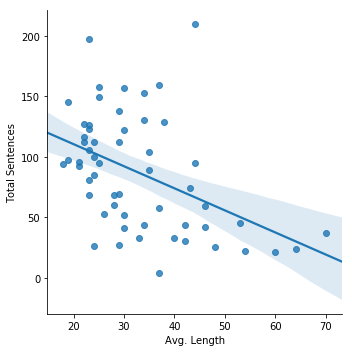

In [37]:
sd = []
for fileid in inaugural.fileids():
    num_sents = len(inaugural.sents(fileid))
    avg_sents = sum(len(sents) for sents in inaugural.sents(fileid)) / len(inaugural.sents(fileid))
    sd.append({'Address': fileid[:-4], 'Total Sentences': round(num_sents), 'Avg. Length': round(avg_sents)})
    
df3 = pd.DataFrame(sd)
ts_2 = pd.date_range(start='1790', end='2015', periods=56).year
ts_df_2 = pd.DataFrame(ts)
df3 = df3.assign(Dates=ts_df_2)
df3.plot(y="Total Sentences", x="Dates", figsize=(15,6))
df3.plot(y='Avg. Length', x="Dates", figsize=(15,6))
plt.plot(figsize=(15,6))
sns.lmplot(x="Avg. Length", y="Total Sentences", data=df3)

## Frequency Distribution of Top 10 Words

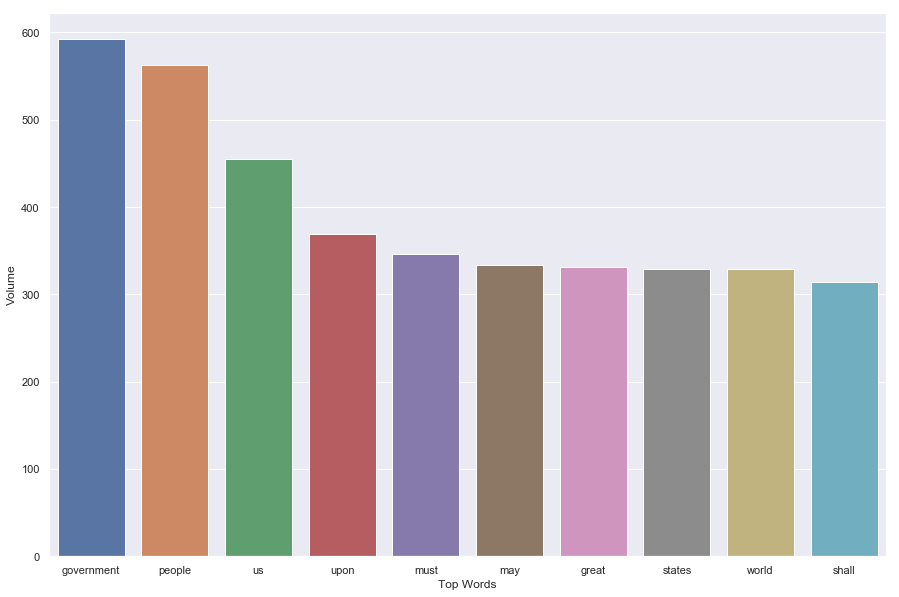

In [220]:
nrmlz = [w.lower() for w in inaugural.words() if w.isalpha()]
stopwords = [w for w in nrmlz if w not in stopwords.words('english')]
fdist = FreqDist(stopwords)
top_10 = fdist.most_common(10)
top_10_df = pd.DataFrame(top_10)
top_10_df.columns=("Top Words", "Volume")
sns.barplot(x="Top Words", y="Volume", data=top_10_df)
sns.set_context("poster")
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

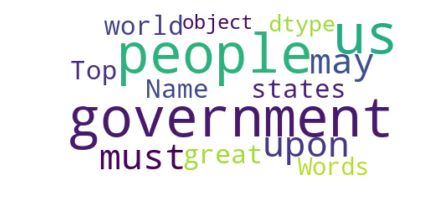

In [168]:
text = top_10_df["Top Words"]
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()